# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [2]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [3]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE


class RBNode:
    def __init__(self, value, parent, color=False):
        self.value = value
        self.left = None
        self.right = None
        self.color = color
        self.parent = parent

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

Use the cell below to implement the requested API by means of **sequential search**.

In [4]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        self.data = []

    def insertElement(self, element):
        # ADD YOUR CODE HERE
        if not self.searchElement(element):
            self.data.append(element)
            return True
        return False

    def searchElement(self, element):
        for item in self.data:
            if item == element:
                return True
        return False

Use the cell below to implement the requested API by means of **binary search tree**.

In [5]:
class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = None

    def insertElement(self, element):
        if self.root is None:
            self.root = Node(element)
            return True
        current = self.root
        while current:
            if current.value == element:
                return False
            elif current.value > element:
                if current.left is None:
                    current.left = Node(element)
                    return True
                current = current.left
            else:
                if current.right is None:
                    current.right = Node(element)
                    return True
                current = current.right

    def searchElement(self, element):
        current = self.root
        while current:
            if current.value == element:
                return True
            elif current.value > element:
                current = current.left
            else:
                current = current.right
        return False

Use the cell below to implement the requested API by means of **balanced search tree**.

In [196]:
class BalancedSearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    def searchElement(self, element):
        found = False
        current = self.root
        while current:
            if current.value == element:
                found = True
                break
            elif current.value > element:
                current = current.left
            else:
                current = current.right
        return found

    def insertElement(self, element):
        new_node = RBNode(element, None, True)
        if self.root is None:
            self.root = new_node
        else:
            parent = None
            node = self.root
            while node is not None:
                parent = node
                if new_node.value < node.value:
                    node = node.left
                elif new_node.value > node.value:
                    node = node.right
                else:
                    return False

            new_node.parent = parent
            if new_node.value < parent.value:
                parent.left = new_node
            else:
                parent.right = new_node

        self.balanceTree(new_node)
        return True

    def balanceTree(self, node):
        while node.parent is not None and node.parent.color:
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle is not None and uncle.color:
                    node.parent.color = False
                    uncle.color = False
                    node.parent.parent.color = True
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.rotateLeft(node)

                    node.parent.color = False
                    node.parent.parent.color = True
                    self.rotateRight(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle is not None and uncle.color:
                    node.parent.color = False
                    uncle.color = False
                    node.parent.parent.color = True
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.rotateRight(node)

                    node.parent.color = False
                    node.parent.parent.color = True
                    self.rotateLeft(node.parent.parent)

        self.root.color = False

    def rotateLeft(self, node):
        right_child = node.right
        node.right = right_child.left
        if right_child.left is not None:
            right_child.left.parent = node

        right_child.parent = node.parent
        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child

        right_child.left = node
        node.parent = right_child

    def rotateRight(self, node):
        left_child = node.left
        node.left = left_child.right
        if left_child.right is not None:
            left_child.right.parent = node

        left_child.parent = node.parent
        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child

        left_child.right = node
        node.parent = left_child


Use the cell below to implement the requested API by means of **bloom filter**.

In [183]:
from bitarray import bitarray

class BloomFilterSet(AbstractSet):
    def __init__(self):
        self.size = 840000
        self.num_hashes = 4
        self.bit_array = bitarray(self.size)
        self.bit_array.setall(0)

    def builtin_hash(self, element, seed):
        return hash(element + str(seed)) % self.size

    def insertElement(self, element):
        inserted = False
        for seed in range(self.num_hashes):
            hash_val = self.builtin_hash(element, seed)
            if self.bit_array[hash_val] == 0:
                inserted = True
                self.bit_array[hash_val] = 1
        return inserted

    def searchElement(self, element):
        for seed in range(self.num_hashes):
            hash_val = self.builtin_hash(element, seed)
            if self.bit_array[hash_val] == 0:
                return False
        return True



Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [299]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        self.data = []
        self.word_length = 4

    def generateData(self, size):     
        self.data = []
        for i in range(size):
            self.data.append("".join(random.choices(string.ascii_lowercase, k=self.word_length)))
        return self.data

    def generateSearchSet(self, size):
        search_set = []
        for i in range(size//2):
            search_set.append(random.choice(self.data))
            search_set.append("".join(random.choices(string.ascii_lowercase, k=self.word_length)))
        return search_set

    def bstWorstCase(self):
        return self.merge_sort(self.data)

    def merge_sort(self, data):
        if len(data) <= 1:
            return data
        mid = len(data) // 2
        left = self.merge_sort(data[:mid])
        right = self.merge_sort(data[mid:])
        return self.merge(left, right)

    def merge(self, left, right):
        result = []
        while len(left) > 0 and len(right) > 0:
            if left[0] < right[0]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        if len(left) > 0:
            result += left
        if len(right) > 0:
            result += right
        return result


Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [301]:
import timeit

def read_file(filename):
    my_file = open(filename, 'r')
    data = my_file.read().split()
    my_file.close()
    return data

files = ['test1-mobydick.txt', 'test2-warpeace.txt', 'test3-dickens.txt']
search_set = read_file('testfiles/test-search.txt')


def print_data(Name, insert_time, search_time):
    print(f"Insert and search times for {Name} are as follows:")
    print(f"Insert time: {insert_time:.6f} seconds")
    print(f"Search time: {search_time:.6f} seconds")
    print()

def test_total_time(searchAlg ,search_set, data_set):
    insert_time = timeit.timeit(lambda: [searchAlg.insertElement(word) for word in data_set], number=10)/10
    search_time = timeit.timeit(lambda: [searchAlg.searchElement(search_word)
                                         for search_word in search_set], number=10)/10
    return insert_time, search_time

def total_times_real():

    for file in files:

        seq, bst, llrb, bloom = SequentialSearchSet(), BinarySearchTreeSet(), BalancedSearchTreeSet(), BloomFilterSet()
        print(f"Testing {file[6:-4]}")
        for searchAlg in (seq, bst, llrb, bloom):
            insert_time, search_time = test_total_time(searchAlg, search_set, read_file(f"testfiles/{file}"))
            print_data(searchAlg.__class__.__name__, insert_time, search_time)



Test Synthetic Data times

In [ ]:
def average_times_synthetic(search, data, size):
    seq = SequentialSearchSet()
    bst = BinarySearchTreeSet()
    rb = BalancedSearchTreeSet()
    bloom = BloomFilterSet()
    if size <= 500000:
        s = (seq ,bst, rb, bloom)
    else:
        s = (bst, rb, bloom)
    for searchAlg in s:
        insert_time, search_time = test_total_time(searchAlg, search, data)
        print_data(searchAlg.__class__.__name__, insert_time, search_time)

def worst_times_synthetic(search, data):
    bst = BinarySearchTreeSet()
    insert_time, search_time = test_total_time(bst, search, data)
    print_data(bst.__class__.__name__, insert_time, search_time)

def test_worst_average():
    tdg = TestDataGenerator()
    for size in (100, 500, 1000, 5000, 10000, 100000, 500000, 1000000):
        print(f"For data set of size: {size}")
        data = tdg.generateData(size)
        search = tdg.generateData(size//10)
        worst = tdg.bstWorstCase()
        if size < 500000:
            print("Worst case (BST):")
            worst_times_synthetic(search, worst)
        print("Average cases:")
        average_times_synthetic(search, data, size)

test_worst_average()

For data set of size: 100
Worst case (BST):
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 0.000003 seconds
Search time: 0.000003 seconds

Average cases:
Insert and search times for SequentialSearchSet are as follows:
Insert time: 0.000063 seconds
Search time: 0.000011 seconds

Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 0.000035 seconds
Search time: 0.000003 seconds

Insert and search times for BalancedSearchTreeSet are as follows:
Insert time: 0.000044 seconds
Search time: 0.000003 seconds

Insert and search times for BloomFilterSet are as follows:
Insert time: 0.000076 seconds
Search time: 0.000003 seconds

For data set of size: 500
Worst case (BST):
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 0.000052 seconds
Search time: 0.000039 seconds

Average cases:
Insert and search times for SequentialSearchSet are as follows:
Insert time: 0.001359 seconds
Search time: 0.000263 seconds

Insert and

Testing BloomFilter false positives

In [264]:
def test_bloom_filter_accuracy(size=100000):
    bloom = BloomFilterSet()
    data = TestDataGenerator()

    words = data.generateData(size)

    for word in words:
        bloom.insertElement(word)

    search_words = data.generateData(size // 10)

    false_positives = 0
    for word in search_words:
        if bloom.searchElement(word) and word not in words:
            false_positives += 1

    print(f"Number of false positives: {false_positives}")

# Call the function with the default size of 100,000
test_bloom_filter_accuracy()

Number of false positives: 134


Plotting all algorithms onto one graph

INSERTION TIMES


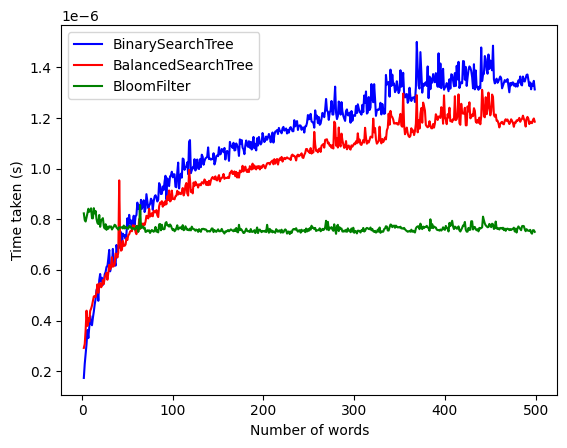

SEARCH TIMES


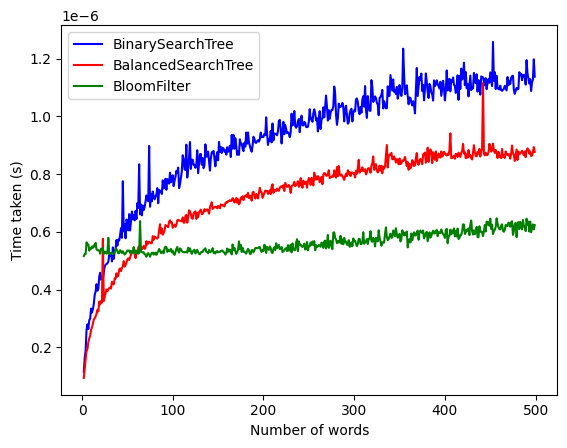

In [306]:
import matplotlib.pyplot as plt

def times_for_graphs(search_alg, search_set, data_set):
    insert_time = timeit.timeit(lambda: [search_alg.insertElement(word) for word in data_set], number=1000)/1000
    search_time = timeit.timeit(lambda: [search_alg.searchElement(search_word)
                                         for search_word in search_set], number=1000)/1000
    return insert_time, search_time


def test_algorithms(bst, rbt, bf, search_set, data_set):
    bst_insert_time, bst_search_time = times_for_graphs(bst, search_set, data_set)
    rbt_insert_time, rbt_search_time = times_for_graphs(rbt, search_set, data_set)
    bf_insert_time, bf_search_time = times_for_graphs(bf, search_set, data_set)

    return (bst_insert_time, bst_search_time), (rbt_insert_time, rbt_search_time), (bf_insert_time, bf_search_time)


def run_tests(input_sizes, test):
    bst_insert_times = []
    bst_search_times = []

    rbt_insert_times = []
    rbt_search_times = []

    bf_insert_times = []
    bf_search_times = []

    bst = BinarySearchTreeSet()
    rbt = BalancedSearchTreeSet()
    bf = BloomFilterSet()

    for n in input_sizes:
        search_n = 100
        data_set = test.generateData(n)
        search_set = test.generateSearchSet(search_n)

        bst_results, rbt_results, bf_results = test_algorithms(bst, rbt, bf, search_set, data_set)

        bst_insert_times.append(bst_results[0] / n)
        bst_search_times.append(bst_results[1] / search_n)
        rbt_insert_times.append(rbt_results[0] / n)
        rbt_search_times.append(rbt_results[1] / search_n)
        bf_insert_times.append(bf_results[0] / n)
        bf_search_times.append(bf_results[1] / search_n)

    return bst_insert_times, bst_search_times, rbt_insert_times, rbt_search_times, bf_insert_times, bf_search_times


def plot_graph(bst, rbt, bf, input_sizes):
    plt.plot(input_sizes, bst, color='blue', label='BinarySearchTree')
    plt.plot(input_sizes, rbt, color='red', label='BalancedSearchTree')
    plt.plot(input_sizes, bf, color='green', label='BloomFilter')
    plt.xlabel('Number of words')
    plt.ylabel('Time taken (s)')
    plt.legend()
    plt.show()




def generate_graphs():
    test = TestDataGenerator()

    input_sizes = range(1, 500)

    bst_insert_times, bst_search_times, rbt_insert_times, rbt_search_times, bf_insert_times, bf_search_times = run_tests(input_sizes, test)



    print("INSERTION TIMES")
    plot_graph(bst_insert_times[1:], rbt_insert_times[1:], bf_insert_times[1:], input_sizes[1:])
    print("SEARCH TIMES")
    plot_graph(bst_search_times[1:], rbt_search_times[1:], bf_search_times[1:], input_sizes[1:])


generate_graphs()

Graphing Sequential

SEQUENTIAL SEARCH INSERTION AND SEARCH TIMES


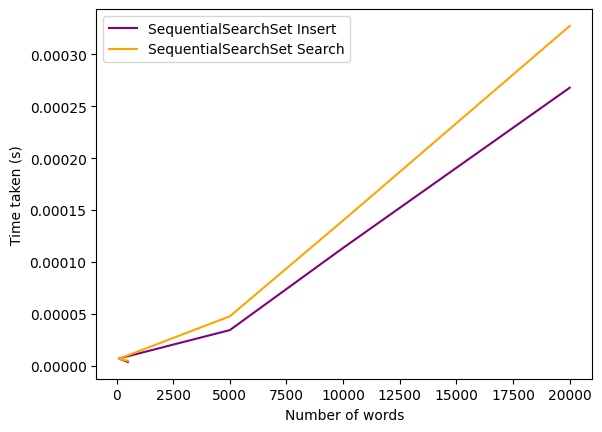

In [309]:
def times_for_graphs(search_alg, search_set, data_set):
    insert_time = timeit.timeit(lambda: [search_alg.insertElement(word) for word in data_set], number=10)/10
    search_time = timeit.timeit(lambda: [search_alg.searchElement(search_word)
                                         for search_word in search_set], number=10)/10
    return insert_time, search_time

def run_sequential_search_tests(input_sizes, test):
    ss_insert_times = []
    ss_search_times = []

    ss = SequentialSearchSet()

    for n in input_sizes:
        search_n = 100
        data_set = test.generateData(n)
        search_set = test.generateSearchSet(search_n)

        ss_results = times_for_graphs(ss, search_set, data_set)

        ss_insert_times.append(ss_results[0] / n)
        ss_search_times.append(ss_results[1] / search_n)

    return ss_insert_times, ss_search_times


def plot_sequential_search_graph(ss_insert, ss_search, input_sizes):
    plt.plot(input_sizes, ss_insert, color='purple', label='SequentialSearchSet Insert')
    plt.plot(input_sizes, ss_search, color='orange', label='SequentialSearchSet Search')
    plt.xlabel('Number of words')
    plt.ylabel('Time taken (s)')
    plt.legend()
    plt.show()


def generate_sequential_search_graphs():
    test = TestDataGenerator()

    input_sizes = [1,500,100,5000,10000,20000]

    ss_insert_times, ss_search_times = run_sequential_search_tests(input_sizes, test)

    print("SEQUENTIAL SEARCH INSERTION AND SEARCH TIMES")
    plot_sequential_search_graph(ss_insert_times, ss_search_times, input_sizes)


generate_sequential_search_graphs()

Graphing BST average and worst case

BST INSERTION TIMES


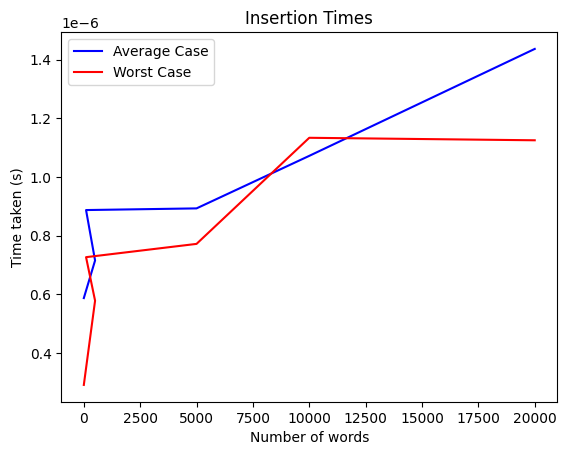

BST SEARCH TIMES


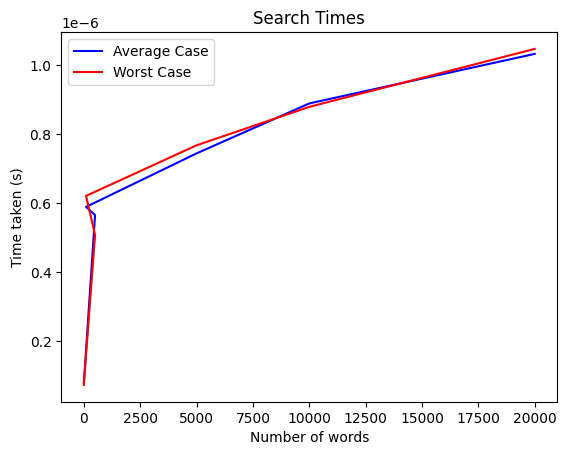

In [313]:
def run_bst_tests(input_sizes, test):
    bst_insert_times_avg = []
    bst_search_times_avg = []
    bst_insert_times_worst = []
    bst_search_times_worst = []

    bst = BinarySearchTreeSet()

    for n in input_sizes:
        search_n = 100
        data_set = test.generateData(n)
        search_set = test.generateSearchSet(search_n)

        bst_results_avg = times_for_graphs(bst, search_set, data_set)
        bst_insert_times_avg.append(bst_results_avg[0] / n)
        bst_search_times_avg.append(bst_results_avg[1] / search_n)

        worst_case_data_set = test.bstWorstCase()
        bst_results_worst = times_for_graphs(bst, search_set, worst_case_data_set)
        bst_insert_times_worst.append(bst_results_worst[0] / n)
        bst_search_times_worst.append(bst_results_worst[1] / search_n)

    return bst_insert_times_avg, bst_search_times_avg, bst_insert_times_worst, bst_search_times_worst


def plot_bst_graph(avg, worst, input_sizes, title):
    plt.plot(input_sizes, avg, color='blue', label='Average Case')
    plt.plot(input_sizes, worst, color='red', label='Worst Case')
    plt.xlabel('Number of words')
    plt.ylabel('Time taken (s)')
    plt.title(title)
    plt.legend()
    plt.show()


def generate_bst_graphs():
    test = TestDataGenerator()

    input_sizes = [1,500,100,5000,10000,20000]

    bst_insert_times_avg, bst_search_times_avg, bst_insert_times_worst, bst_search_times_worst = run_bst_tests(input_sizes, test)

    print("BST INSERTION TIMES")
    plot_bst_graph(bst_insert_times_avg, bst_insert_times_worst, input_sizes, 'Insertion Times')
    print("BST SEARCH TIMES")
    plot_bst_graph(bst_search_times_avg, bst_search_times_worst, input_sizes, 'Search Times')


generate_bst_graphs()